In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("loan_approval_dataset.csv")

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']


df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
df[' loan_status'] = label_encoder.fit_transform(df[' loan_status'])
df[' education'] = label_encoder.fit_transform(df[' education'])
df[' self_employed'] = label_encoder.fit_transform(df[' self_employed'])

In [6]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Movable_assets,Immovable_assets
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,30700000,20000000
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,12100000,4900000
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,46100000,11600000
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,31200000,21500000
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,34400000,20600000


In [7]:
drop_col=['loan_id',' bank_asset_value', ' luxury_assets_value',' residential_assets_value',' commercial_assets_value']
df = df.drop(columns=drop_col)


In [8]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,0,0,9600000,29900000,12,778,0,30700000,20000000
1,0,1,1,4100000,12200000,8,417,1,12100000,4900000
2,3,0,0,9100000,29700000,20,506,1,46100000,11600000
3,3,0,0,8200000,30700000,8,467,1,31200000,21500000
4,5,1,1,9800000,24200000,20,382,1,34400000,20600000


Text(0.5, 1.0, 'Number of Dependents')

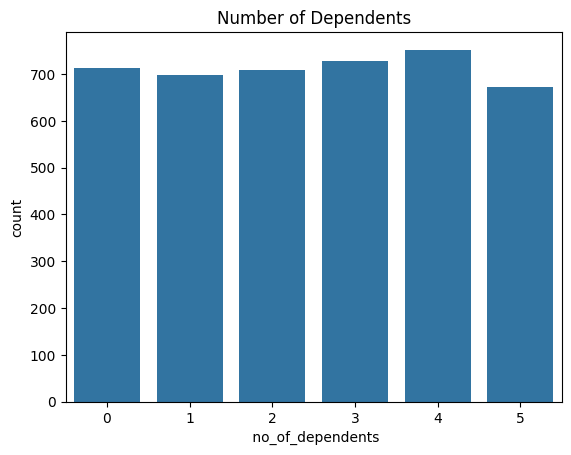

In [9]:
import seaborn as sns
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

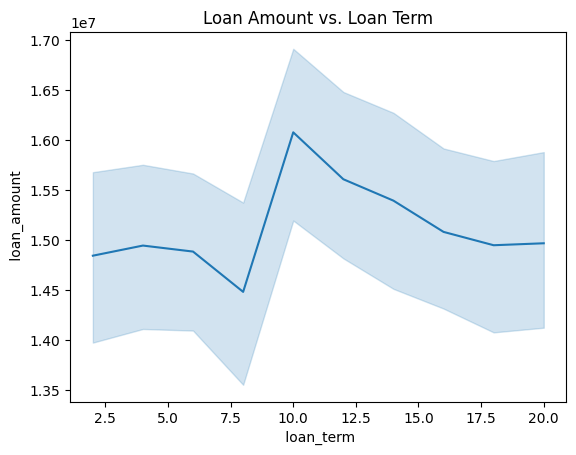

In [10]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [13]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
dtree.score(X_train, y_train)

1.0

In [15]:
dtree_pred = dtree.predict(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [17]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
rfc_pred = rfc.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accu=accuracy_score(y_test,dtree_pred)
accu

0.9836065573770492

In [20]:
from sklearn.metrics import accuracy_score
accu1=accuracy_score(y_test,rfc_pred)
accu1

0.9789227166276346

In [ ]:
# def calculate_assets(df, bank_asset_value, luxury_assets_value, residential_assets_value, commercial_assets_value):
#     Movable_assets = bank_asset_value+ luxury_assets_value

#     Immovable_assets = residential_assets_value+ commercial_assets_value

In [21]:
input_data=(5,1,0,100000,50000000,12,732,700000,500000)

input_np_data=np.asarray(input_data)

input_data_reshaped=input_np_data.reshape(1,-1)

# std_data= scaler.transform(input_data_reshaped)
# print(std_data)


pridictions=dtree.predict(input_data_reshaped)
print(pridictions)

[1]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
import joblib
pipeline_file = open("./loan_model.pkl","wb")
joblib.dump(dtree,pipeline_file)
pipeline_file.close()